## Bike Sharing Problem - EDA & Random Forest Modelling 
Bike sharing systems are a means of renting bicycles where the process of obtaining membership, rental, and bike return is automated via a network of kiosk locations throughout a city. Using these systems, people are able rent a bike from a one location and return it to a different place on an as-needed basis. Currently, there are over 500 bike-sharing programs around the world.

The data generated by these systems makes them attractive for researchers because the duration of travel, departure location, arrival location, and time elapsed is explicitly recorded. Bike sharing systems therefore function as a sensor network, which can be used for studying mobility in a city. Our aim here is to combine historical usage patterns with weather data in order to do EDA on the Capital Bikeshare program in Washington, D.C.

In [254]:
#importing libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno


In [255]:
plt.style.use('tableau-colorblind10')

In [256]:
#loading dataset
#parse_dates function converts datetime column from object dtype to datetime64[ns] dtype 
df= pd.read_csv('https://raw.githubusercontent.com/sanketkangle/Exploratory-Data-Analysis/master/bikes_sharing_problem_dataset.csv',
               parse_dates=['datetime']) 

#checking the head
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [257]:
df.shape

(10886, 12)

In [258]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [259]:
df.isna().value_counts()

datetime  season  holiday  workingday  weather  temp   atemp  humidity  windspeed  casual  registered  count
False     False   False    False       False    False  False  False     False      False   False       False    10886
dtype: int64

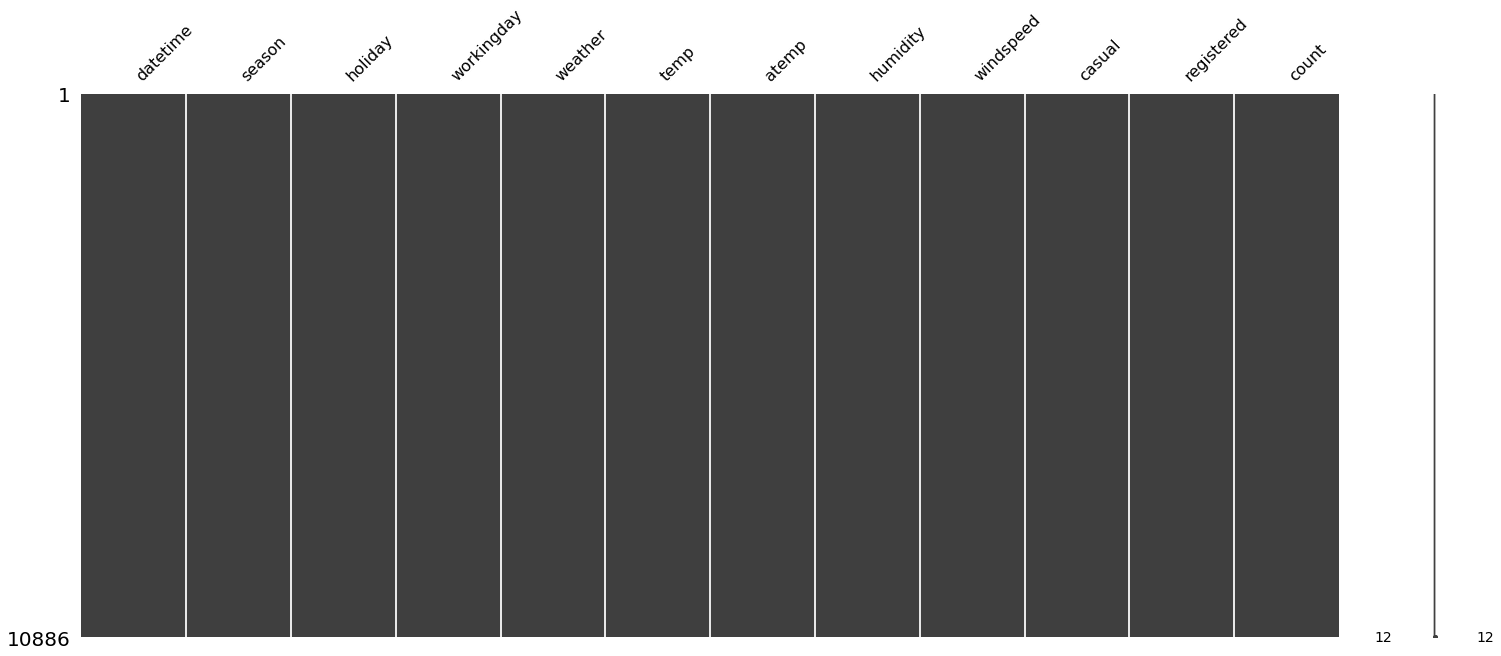

In [260]:
a=msno.matrix(df)
plt.savefig("null values.png")

<AxesSubplot:xlabel='season', ylabel='count'>

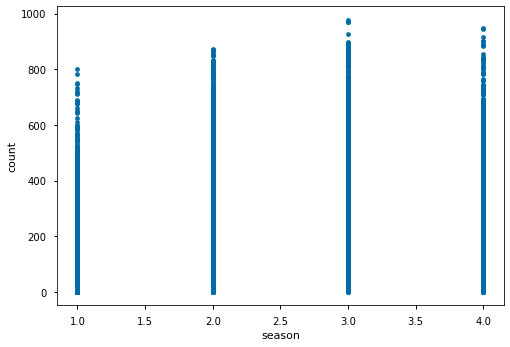

In [261]:
df.plot.scatter(x='season', y='count')
#plt.savefig("season_Vs_count.png")

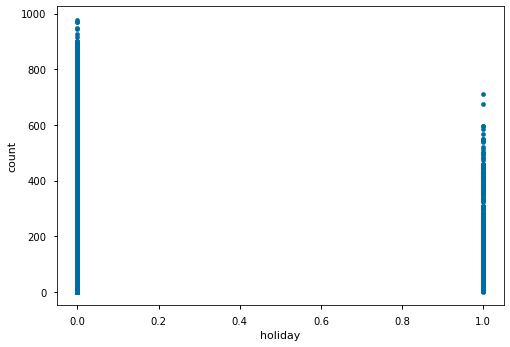

In [262]:
df.plot.scatter(x="holiday", y="count")
plt.savefig("count_vs_holiday.png")

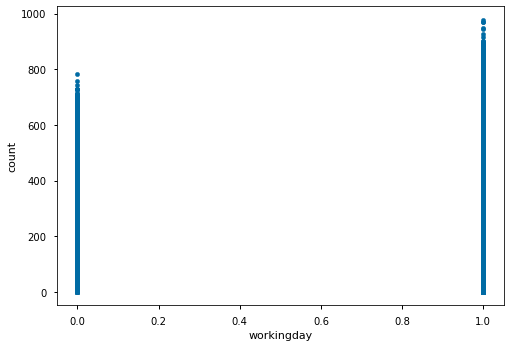

In [263]:
df.plot.scatter(x="workingday", y="count")
plt.savefig("workingday_vs_count")

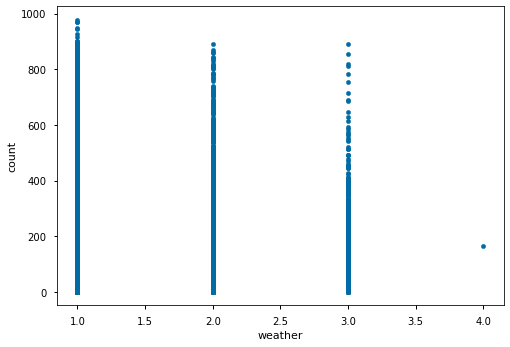

In [264]:
df.plot.scatter(x="weather", y='count')
plt.savefig("count_vs_weather.png")

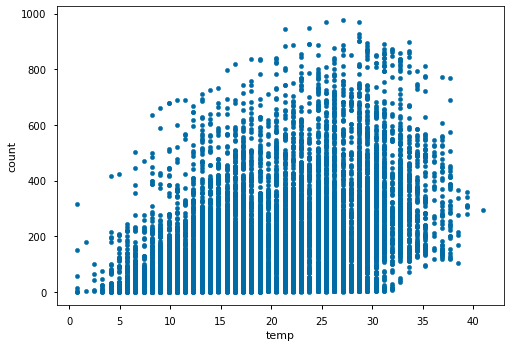

In [265]:
df.plot.scatter(x="temp", y="count")
plt.savefig("temp_vs_count.png")

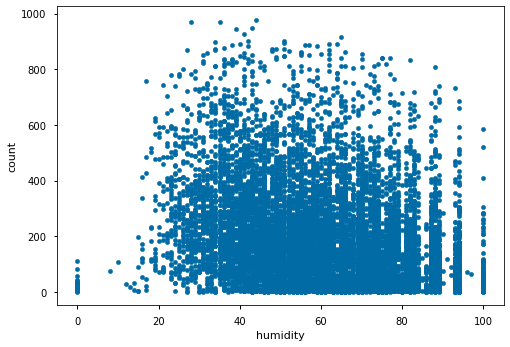

In [266]:
df.plot.scatter(x="humidity", y="count")
plt.savefig("humidity_vs_count.png")

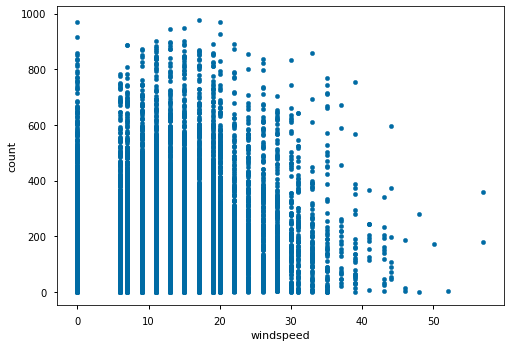

In [267]:
df.plot.scatter(x="windspeed", y="count")
plt.savefig("wind_vs_count.png")

In [268]:
# method for creating the count plot based on hour for a given year 
def plot_by_hour(data, year=None, agg='sum'):
    dd = data       #flag 1
    if year : 
        dd = dd[dd.datetime.dt.year == year]  #fla3 2
    dd.loc[:, ('hour')] = dd.datetime.dt.hour  #flag 3
    by_hour = dd.groupby(['hour', 'workingday'])['count'].agg(agg).unstack()   #flag 4
    return by_hour.plot(kind='bar', 
                        title="year = {0}".format(year),figsize=(15,5), width=0.9) #flag 5

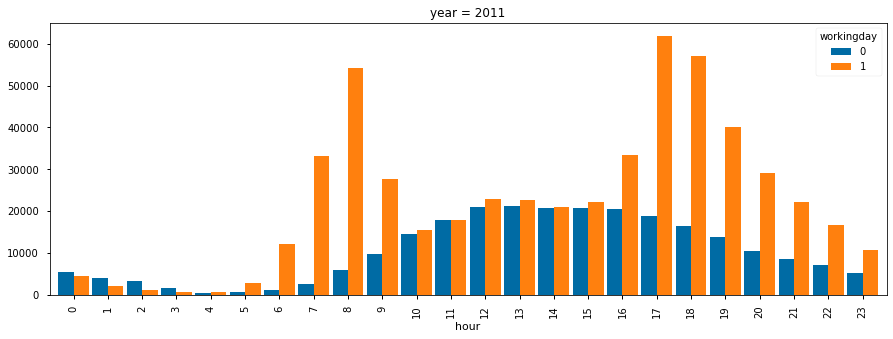

In [269]:
plot_by_hour(df, year=2011)
plt.savefig("by_hour_2011.png")

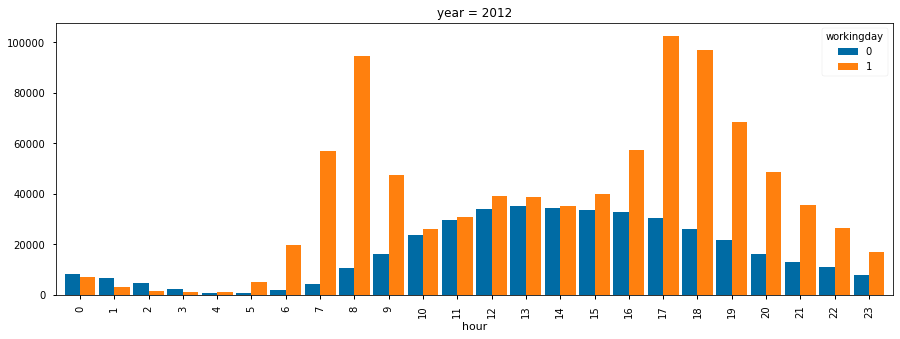

In [270]:
plot_by_hour(df, year=2012)
plt.savefig("by_hour_2012.png")

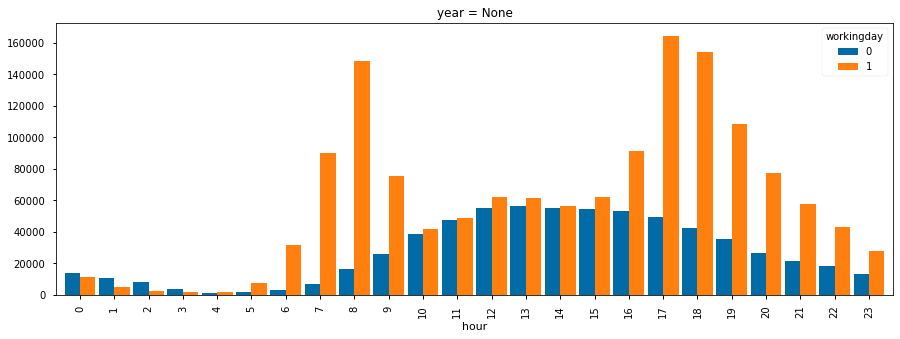

In [271]:
plot_by_hour(df)
plt.savefig("by_hour_complete.png")

In [272]:
def plot_by_year(data,col, title):
    dd = data.copy()     #flag 1
    dd['year'] = data.datetime.dt.year     #flag 2
    dd['month'] = data.datetime.dt.month   #flag 3
    dd['hour'] = data.datetime.dt.hour     #flag 4
    by_year = dd.groupby([col, 'year'])["count"].agg('sum').unstack()   #flag 5
    return by_year.plot(kind='bar', figsize=(15,5), width=0.9, title=title)  #flag 6

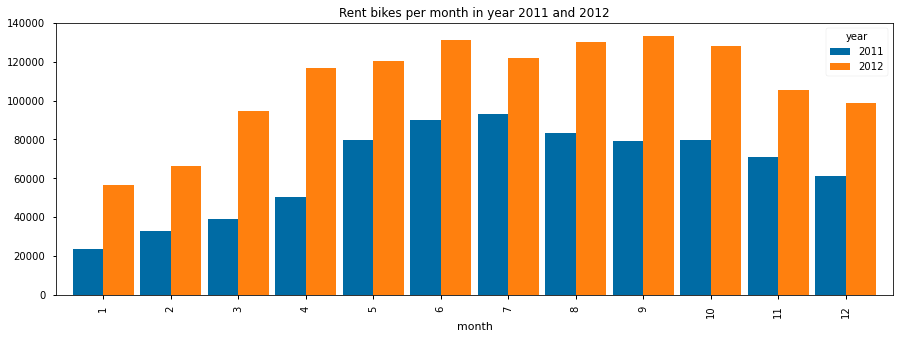

In [273]:
plot_by_year(df,'month', "Rent bikes per month in year 2011 and 2012")
plt.savefig("month_year.png")

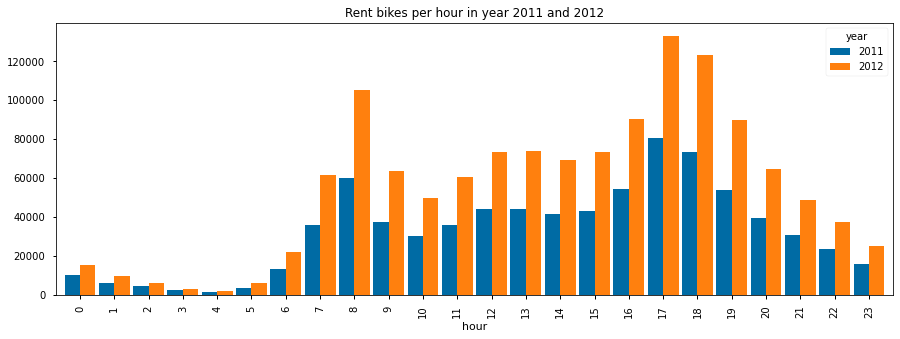

In [274]:
plot_by_year(df, 'hour', 'Rent bikes per hour in year 2011 and 2012')
plt.savefig("hour_year.png")

In [275]:
df['year'] = df.datetime.dt.year
df['month'] = df.datetime.dt.month
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,year,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,2011,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,2011,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,2011,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,2011,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,2011,1


In [276]:
count_2011 = df[df.year==2011]['count'].agg('sum')
count_2012 = df[df.year==2012]['count'].agg('sum')
percentage_growth = (count_2012-count_2011)*100/count_2011
percentage_growth

66.69207229350148